# Linear Regression vs. Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/Country-data.csv")

In [3]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
X = dataset.iloc[:,1:]

In [5]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


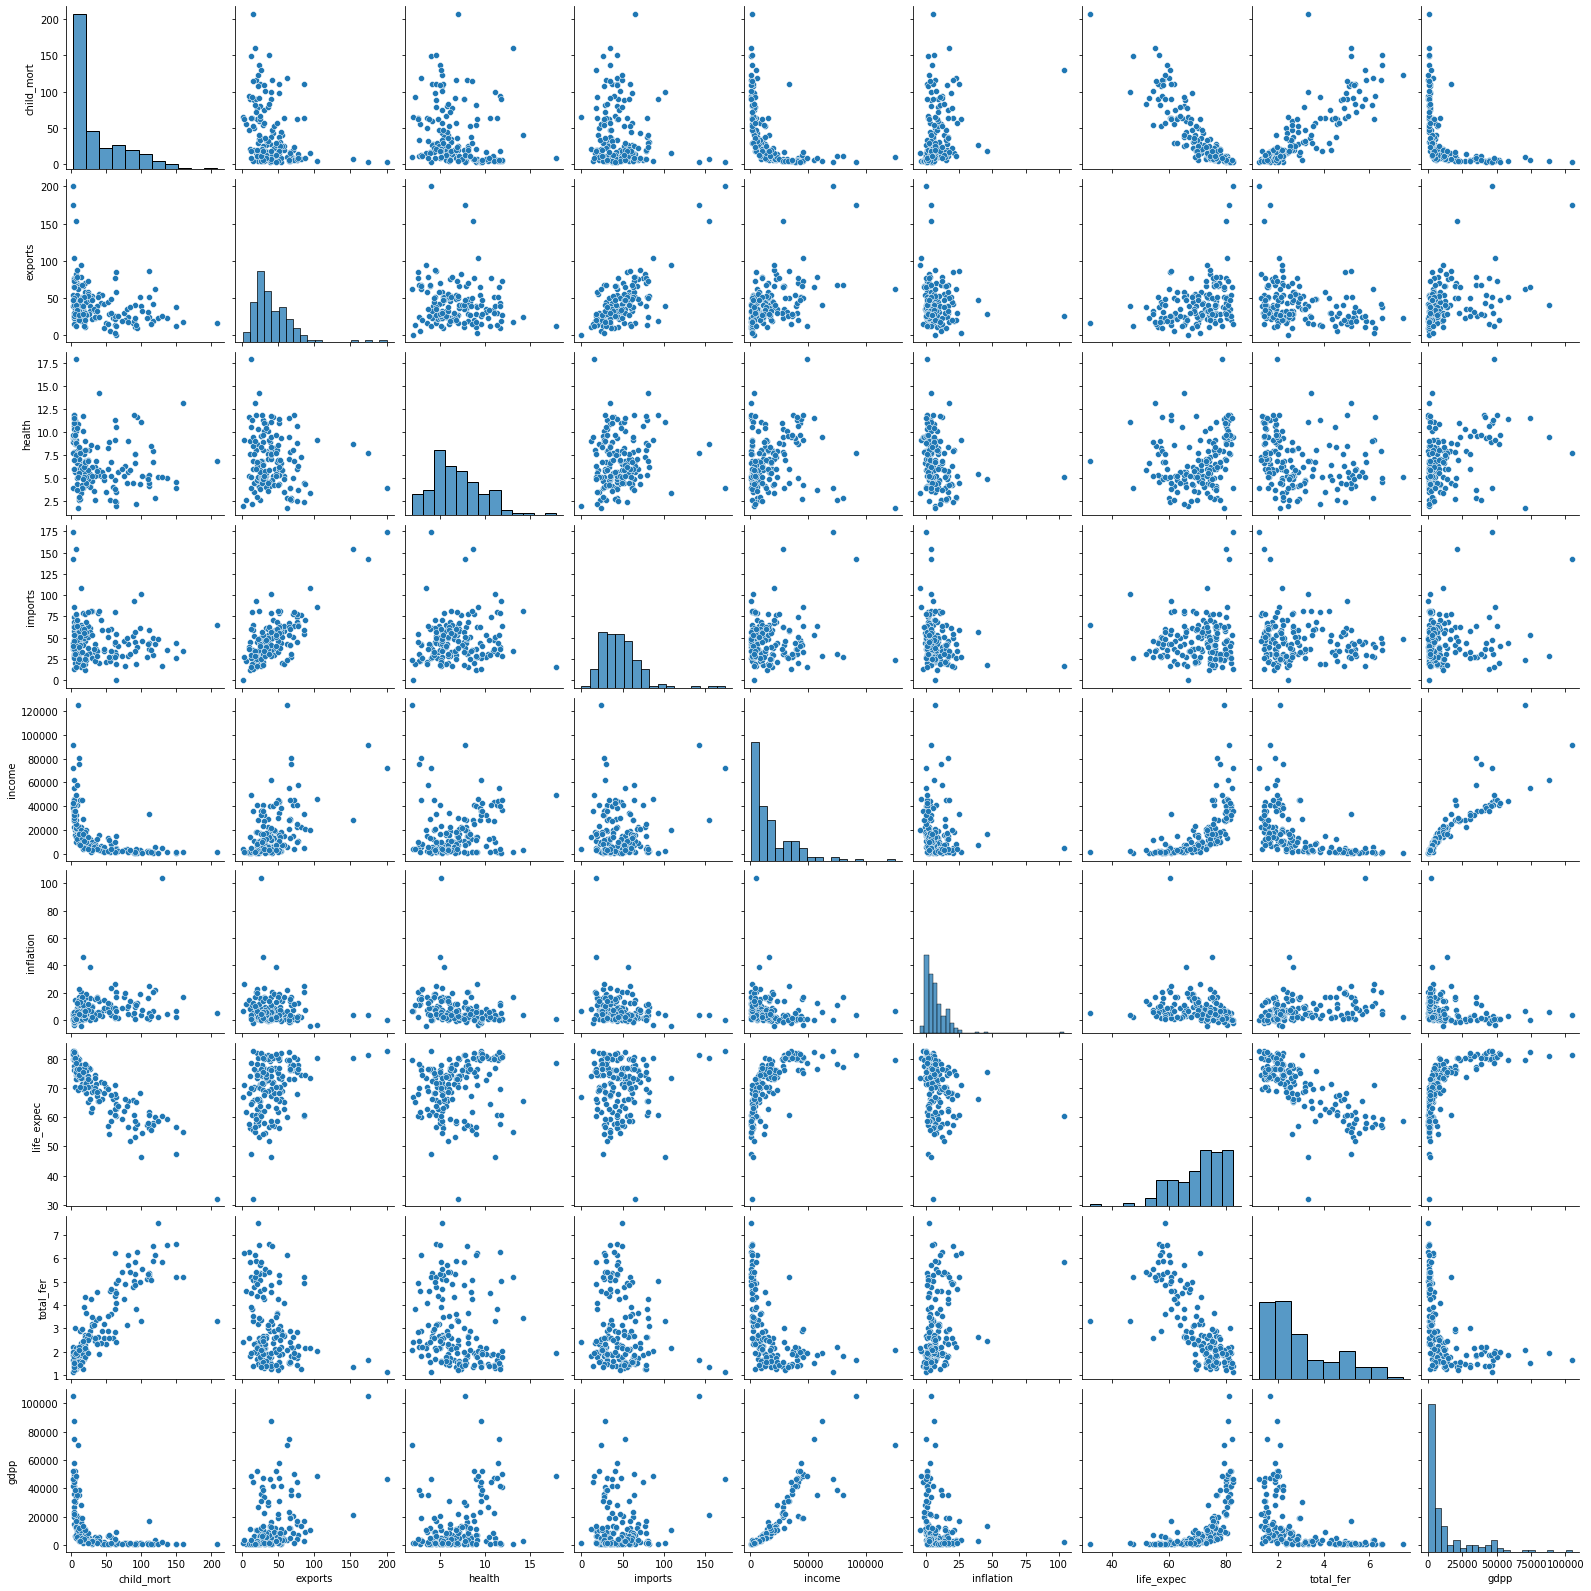

In [6]:
sns.pairplot(X)

## Data Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_normal = MinMaxScaler().fit_transform(X)
X_normal = pd.DataFrame(X_normal,columns=X.columns)

# Regression

## Deep Neural Network

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
model = keras.Sequential([
                          keras.layers.Dense(4, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1)
                          ])

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [11]:
history = model.fit(X_normal["life_expec"],X_normal["gdpp"], epochs = 200,verbose = 0)

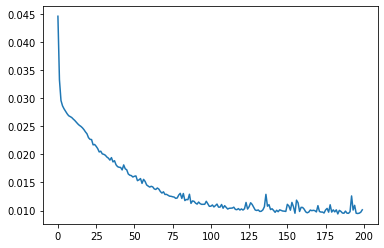

In [12]:
plt.plot(history.history['mse'])

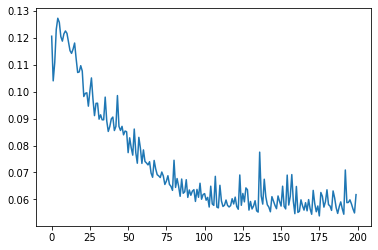

In [13]:
plt.plot(history.history['mae'])

In [14]:
XtoY = tf.linspace(0.0, 1, 200)
Yhat = np.squeeze(model.predict(XtoY))

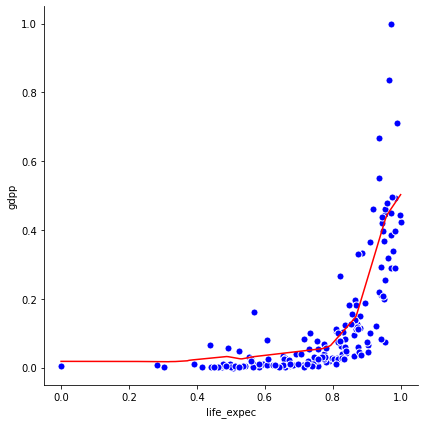

In [15]:
g = sns.FacetGrid(X_normal, margin_titles=True, height=6)
g.map(plt.scatter, "life_expec", "gdpp", color="blue", edgecolor="white", s=50, lw=1)
plt.plot(XtoY, Yhat, color="red")
#fg = sns.scatterplot(x = "life_expec", y = "gdpp", data = X_normal)

### With Plotly

In [18]:
import plotly.express as px
import plotly.graph_objects as go

In [19]:
fig = px.scatter(X_normal, x="life_expec", y="gdpp",opacity=0.9)
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title_text='Deep Neural Network', title_x=0.5)

fig.add_trace(go.Scatter(x=XtoY, y=Yhat,
                    mode='lines',
                    name='DNN',
                    opacity=0.9))

fig.show()

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X_normal["life_expec"][:,np.newaxis], X_normal["gdpp"][:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [22]:
reg.intercept_

array([-0.33242558])

In [23]:
X_normal["life_expec"][:10].shape

(10,)

In [24]:
X_normal["life_expec"][:10, np.newaxis].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



(10, 1)

In [25]:
linear_line = reg.predict(XtoY[:,np.newaxis]).reshape(len(XtoY),)

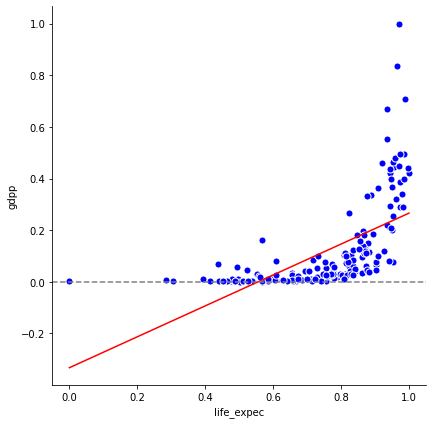

In [26]:
g = sns.FacetGrid(X_normal, margin_titles=True, height=6)
g.map(plt.scatter, "life_expec", "gdpp", color="blue", edgecolor="white", s=50, lw=1)
plt.plot(XtoY, linear_line, color="red")
plt.axhline(y=0, color='gray', linestyle='--')

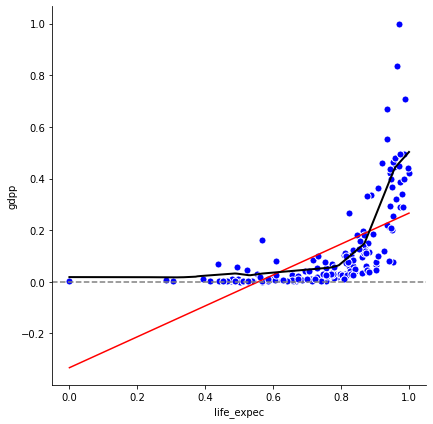

In [27]:
g = sns.FacetGrid(X_normal, margin_titles=True, height=6)
g.map(plt.scatter, "life_expec", "gdpp", color="blue", edgecolor="white", s=50, lw=1)
plt.plot(XtoY, linear_line, color="red")
plt.plot(XtoY, Yhat, color = 'black',linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--')

### with Plotly

In [28]:
fig = go.Figure(layout=go.Layout(height=600, width=800))

fig.add_trace(go.Scatter(x=X_normal["life_expec"], y=X_normal["gdpp"],
                    mode='markers',
                    name='Country',
                    opacity=0.9))

fig.update_traces(marker=dict(size=7,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.add_trace(go.Scatter(x=XtoY, y=Yhat,
                    mode='lines',
                    name='Deep Neural Network',
                    line = dict(width = 4), 
                    opacity=0.9))

fig.add_trace(go.Scatter(x=XtoY, y=linear_line,
                    mode='lines',
                    name='Linear Regression',
                    line = dict(width = 4),
                    opacity=0.9))

fig.add_shape(type="line",
    x0=-0.1, y0=0, x1=1.1, y1=0,
    line=dict(
        color="grey",
        width=1.5,
        dash="dashdot",
    ))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(
    xaxis_title="life_expec",
    yaxis_title="gdpp")

fig.update_layout(title_text='Deep Neural Network', title_x=0.5)

fig.show()